# Load dependencies

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

# Load dataset

In [4]:
df = pd.read_csv('mnist-train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train = df['label'].values
X_train = df.drop('label', axis=1).values
# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
print(X_train.shape, y_train.shape)

(42000, 28, 28, 1) (42000, 10)


Text(0.5, 1.0, 'Class [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

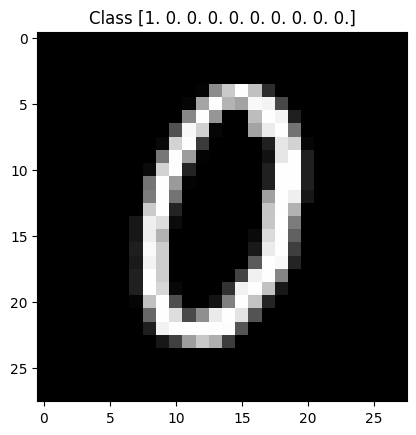

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5], cmap='gray')
plt.title('Class '+ str(y_train[5]))

In [17]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1) (37800, 10) (4200, 10)


# Training the model

In [34]:
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(28,28,1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,658 (3.22 MB)

 Trainable params: 843,658 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [37]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8235 - loss: 3.6572 - val_accuracy: 0.9693 - val_loss: 0.0960
Epoch 2/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9489 - loss: 0.1709 - val_accuracy: 0.9748 - val_loss: 0.0756
Epoch 3/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9641 - loss: 0.1178 - val_accuracy: 0.9831 - val_loss: 0.0549
Epoch 4/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9693 - loss: 0.0997 - val_accuracy: 0.9821 - val_loss: 0.0562
Epoch 5/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9729 - loss: 0.0895 - val_accuracy: 0.9779 - val_loss: 0.0672
Epoch 6/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9782 - loss: 0.0741 - val_accuracy: 0.9795 - val_loss: 0.0713
Epoch 7/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9794 - loss: 0.0643 - val_accuracy: 0.9855 - val_loss: 0.0488
Epoch 8/20
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9801 -

In [38]:
epoch = history.epoch
epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [39]:
accuracy, val_accuracy,  = history.history['accuracy'], history.history['val_accuracy']

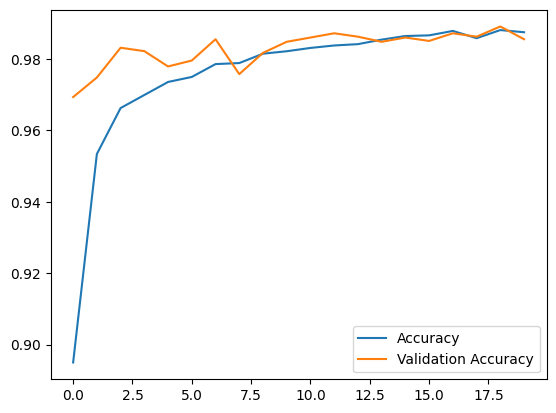

In [40]:
plt.plot(epoch, accuracy, label='Accuracy')
plt.plot(epoch, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()